<a href="https://colab.research.google.com/github/Samuellucas97/ML-E2E-Course/blob/main/UdemyCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing libraries**




In [1]:
# Essential libs
import pandas as pd
import numpy as np

# Graphical libs
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## -> IMPORTANT: This enable to ignore Pandas warnings as well the other warnings.
import warnings
warnings.filterwarnings('ignore')

## **Setting up**

In [3]:
## Setting up Pandas

# It'll only shows 120 rows and 50 columns
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 50)

In [4]:
## Setting up Matplotib

plt.rcParams['figure.figsize']= (15, 6)
# Ploting figure on dark style
plt.style.use('seaborn-darkgrid')

## **Exploring the dataset**

### Getting the dataset

In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/MLOps/house_data.csv')
dataset.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


In [6]:
dataset.shape

(10692, 13)

In [7]:
dataset.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


### Removing unnecessary columns

The `fire insurance` and `total` columns are not needed to arrive at an answer. 


In [9]:
dataset.drop(columns=['fire insurance (R$)', 'total (R$)'], inplace=True)

In [10]:
dataset.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)'],
      dtype='object')

### Checking empty values

You could evaluate first using `isnull` method.


In [11]:
dataset.isnull().sum()

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

There is no empty values.


### Checking unique values

You could use `nunique` method.

In [12]:
dataset.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

## **Exploratory Data Analisys (EDA**)


It means that we'll try to take insights from the data. 

More concretly, we'll use statistical graphs to identify different patterns, relations, and anomalies in the data.


### Spliting between ***Categorical*** and ***Numerical*** columns

In [13]:
categorical_columns = dataset.columns[ dataset.dtypes == object ]
print(f'CATEGORICAL columns: ${categorical_columns}\n\n')
dataset[categorical_columns].head(5)

CATEGORICAL columns: $Index(['city', 'floor', 'animal', 'furniture'], dtype='object')




,city,floor,animal,furniture
0,São Paulo,7,acept,furnished
1,São Paulo,20,acept,not furnished
2,Porto Alegre,6,acept,not furnished
3,Porto Alegre,2,acept,not furnished
4,São Paulo,1,not acept,not furnished


In [14]:
numerical_columns = dataset.columns[ dataset.dtypes == 'int64' ]
print(f'NUMERICAL columns: ${numerical_columns}\n\n')
dataset[numerical_columns].head(5)

NUMERICAL columns: $Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
       'rent amount (R$)', 'property tax (R$)'],
      dtype='object')




,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$)
0,70,2,1,1,2065,3300,211
1,320,4,4,0,1200,4960,1750
2,80,1,1,1,1000,2800,0
3,51,2,1,0,270,1112,22
4,25,1,1,0,0,800,25


### Analysing ***Categorical*** columns

In [15]:
for categorical_column in categorical_columns:
  print(f'COLUMN: {categorical_column}')
  print( dataset[categorical_column].value_counts(normalize=True) * 100 )
  print('\n')

COLUMN: city
São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64


COLUMN: floor
-      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: floor, dtype: float64


COLUMN: animal
acept        77.777778
not acept    22.222222
Name: animal, dtype: float64


COLUMN: furniture
not furnished    75.626637
furnished        24.373363
Name: furniture

We identified some errors: there is `-` and `301` floor. We can use `loc` method to find these rows. We can also use `iloc` to change the value of theses rows.

In [16]:
dataset.loc[dataset.floor == '301']
dataset.iloc[2562, 5] = '30'
print(f'After fixed...\n\n {dataset.loc[dataset.floor == "301"]}')

After fixed...

 Empty DataFrame
Columns: [city, area, rooms, bathroom, parking spaces, floor, animal, furniture, hoa (R$), rent amount (R$), property tax (R$)]
Index: []


In [17]:
print (dataset.loc[dataset.floor == '-'])

print( "\n\nApplying function...\n")
dataset['floor']= dataset.floor.apply( lambda actual_floor: 0 if(actual_floor =="-" ) else actual_floor)
print (dataset.loc[dataset.floor == '-'])


                 city  area  rooms  bathroom  parking spaces floor animal  \
5           São Paulo   376      3         3               7     -  acept   
15           Campinas   330      4         6               6     -  acept   
19          São Paulo   600      4         5               6     -  acept   
20          São Paulo   100      7         4               0     -  acept   
23          São Paulo    35      1         1               0     -  acept   
...               ...   ...    ...       ...             ...   ...    ...   
10659        Campinas   150      3         2               4     -  acept   
10661        Campinas   250      1         2               2     -  acept   
10668       São Paulo    24      1         1               0     -  acept   
10674  Rio de Janeiro   135      4         2               1     -  acept   
10691       São Paulo    80      2         1               0     -  acept   

           furniture  hoa (R$)  rent amount (R$)  property tax (R$)  
5    

Although we cleaned the `floor` column, we need to convert from `object` to `integer`. We can do this using `pd.to_numeric` method.

In [18]:
dataset['floor'] = pd.to_numeric(dataset['floor'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  int64 
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 919.0+ KB


### Analysing ***Numerical*** columns

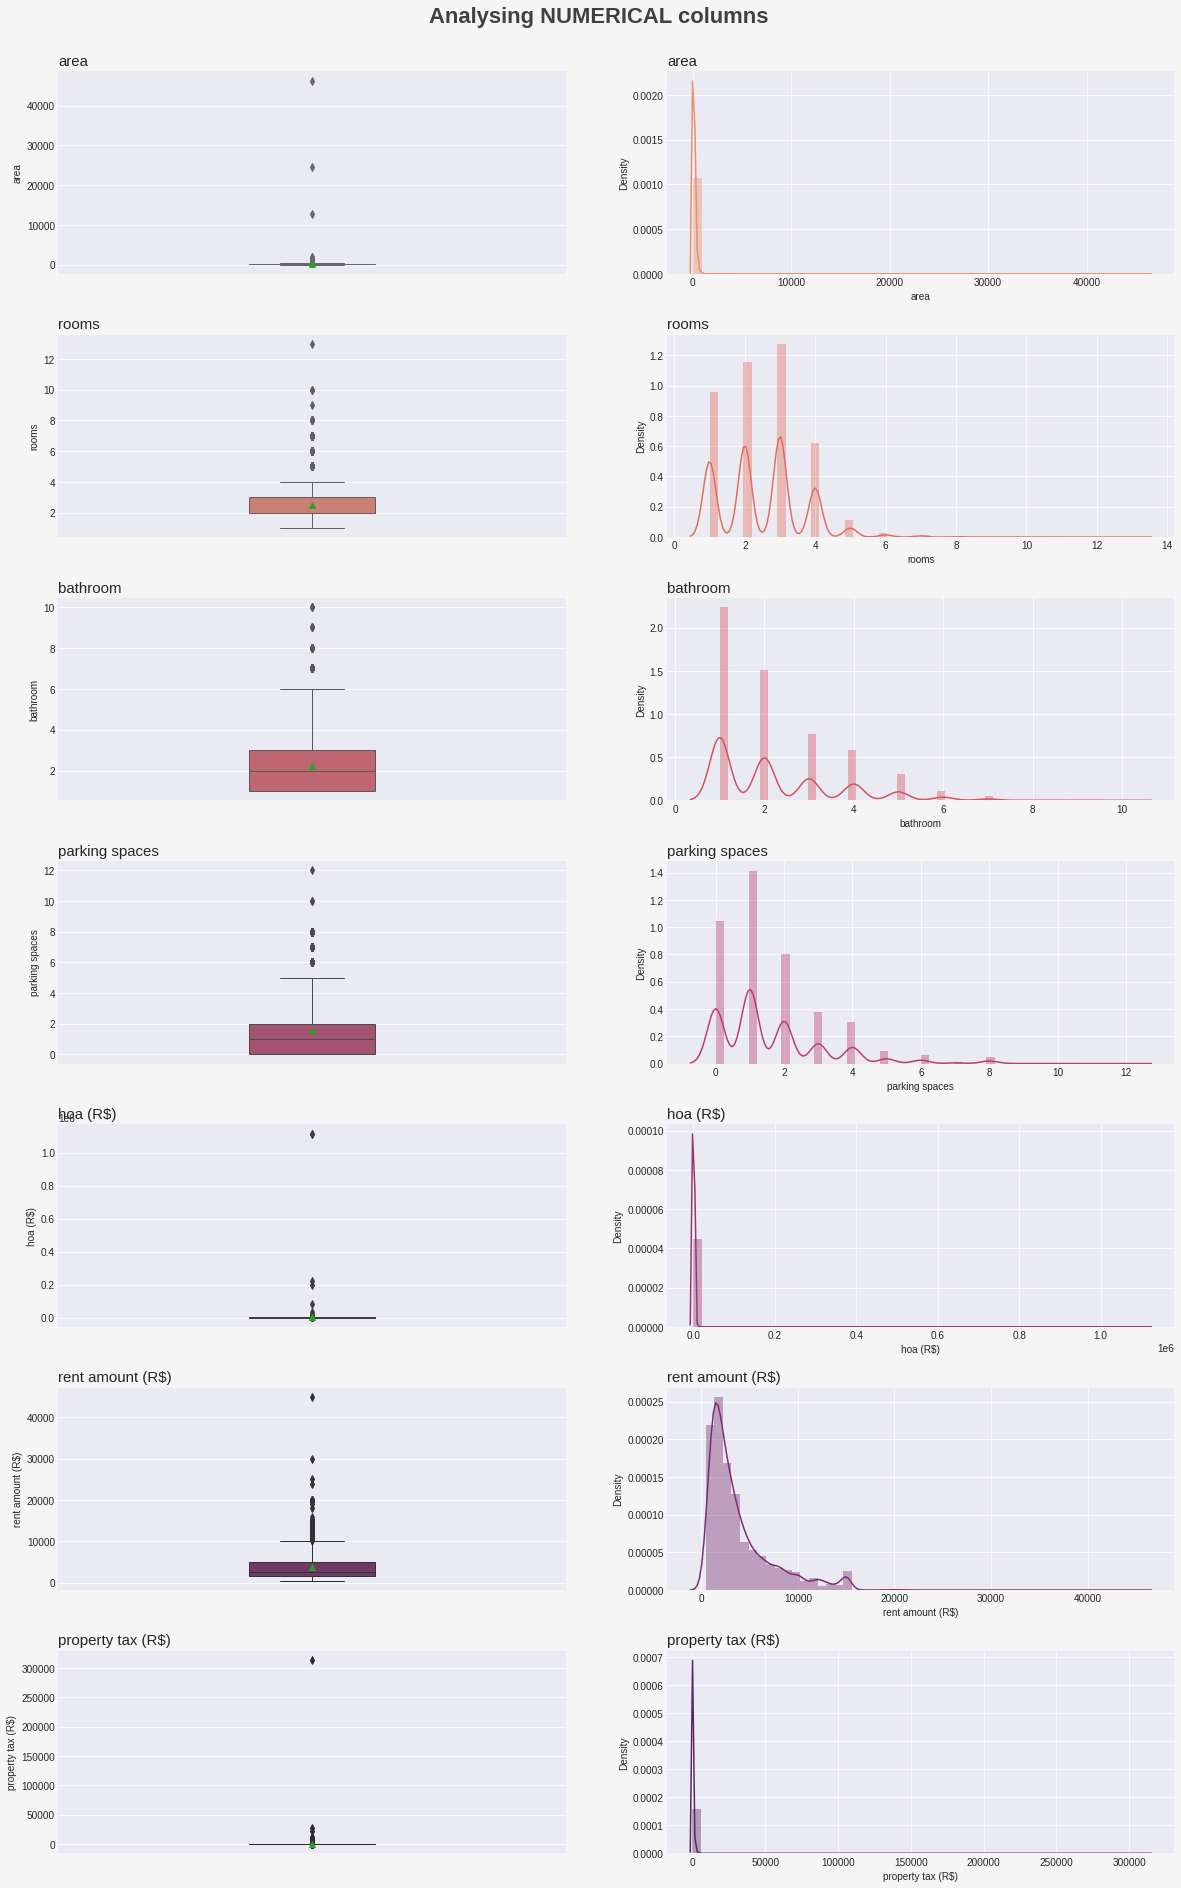

In [19]:
fig, axios = plt.subplots( figsize=(20, 30))

background_color = '#f5f5f5'
fig.set_facecolor(background_color)

color_palette = sns.color_palette('flare', len(numerical_columns)  * 2)

title = 'Analysing NUMERICAL columns'
plt.suptitle(title, fontsize=22, color='#404040', fontweight=600)


number_rows = len(numerical_columns)            ## We will have a row for each dataset column
number_columns = 2                              ## Boxplot + Distplot for each row
position = 1                                    ## Initial position


for actual_column in numerical_columns:
  
  ## BLOXPLOT
  plt.subplot(number_rows, number_columns, position)
  plt.title( f'{actual_column}', loc='left', fontsize=15, fontweight=300)
  sns.boxplot(data=dataset, y=actual_column, showmeans=True, saturation=0.65, linewidth=1, color=color_palette[position], width=0.25)
  position += 1
  
  ## DISTPLOT
  plt.subplot(number_rows, number_columns, position)
  plt.title( f'{actual_column}', loc='left', fontsize=15, fontweight=300)
  sns.distplot(dataset[actual_column], color=color_palette[position - 1])
  position += 1
  
  plt.subplots_adjust(top=0.95, hspace=0.3)


When we analyse **area** column, we could identify some outliners. Most of house areas are concentred less than 10.000m². We could filter these outliners but we will analyse it first.

In [20]:
dataset.loc[ dataset.area <= 10000]["area"].describe()

count    10689.000000
mean       141.431846
std        134.348219
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max       2000.000000
Name: area, dtype: float64

We can notice 75% of house area is less than 200m².

We also identified some unfamiliar distribution in **hoa**. We will try to analysis more.

In [21]:
dataset["hoa (R$)"].describe()

count    1.069200e+04
mean     1.174022e+03
std      1.559231e+04
min      0.000000e+00
25%      1.700000e+02
50%      5.600000e+02
75%      1.237500e+03
max      1.117000e+06
Name: hoa (R$), dtype: float64

In [22]:
dataset["hoa (R$)"].sort_values(ascending=False).head(20)

255      1117000
6979     1117000
6230      220000
2859      200000
2928       81150
1444       32000
1213       15000
415        14130
5293       14000
8858       10000
974        10000
547         9900
7020        9500
7679        9000
1862        8600
6185        8500
1072        8500
10184       8362
254         8300
722         8133
Name: hoa (R$), dtype: int64

In [23]:
dataset.iloc[255]

city                 Belo Horizonte
area                            155
rooms                             1
bathroom                          4
parking spaces                    0
floor                             4
animal                    not acept
furniture             not furnished
hoa (R$)                    1117000
rent amount (R$)               2790
property tax (R$)                64
Name: 255, dtype: object

When we look at the first element, at position 255, we can see that these **hoa** value ​​don't make sense.

In [24]:
dataset.iloc[722]

city                     São Paulo
area                           620
rooms                            4
bathroom                         6
parking spaces                   4
floor                            1
animal                       acept
furniture            not furnished
hoa (R$)                      8133
rent amount (R$)             15000
property tax (R$)             4520
Name: 722, dtype: object

We empirically identify that the 20th row has a hoa that makes sense. I should refine this by identifying from each line these errors start.

In [25]:
dataset.iloc[7020]

city                     São Paulo
area                           224
rooms                            4
bathroom                         5
parking spaces                   3
floor                           12
animal                       acept
furniture            not furnished
hoa (R$)                      9500
rent amount (R$)              9500
property tax (R$)             1650
Name: 7020, dtype: object

We'll do a similar analysis on `rent amount (R$)`.

In [26]:
dataset["rent amount (R$)"].value_counts(ascending=False).head(20)

2500     258
2000     244
1200     237
3000     235
15000    231
3500     216
1800     215
1500     211
4000     202
2200     201
1100     201
4500     182
6000     179
5000     178
1300     177
1600     172
8000     168
1000     167
2800     147
10000    142
Name: rent amount (R$), dtype: int64

In [27]:
dataset.loc[dataset["rent amount (R$)"] < 20000]["rent amount (R$)"].describe()

count    10683.000000
mean      3878.561734
std       3347.355302
min        450.000000
25%       1529.500000
50%       2650.000000
75%       5000.000000
max      19500.000000
Name: rent amount (R$), dtype: float64

From these description, we can see that most of our **rent amount** are less then R$5.000,00.

We will analysis **property tax** column now.

In [28]:
dataset["property tax (R$)"].sort_values(ascending=False).head(10)

6645     313700
6243      28120
1699      21880
10172     12500
5331      10830
2928       9900
7674       9500
19         9500
8187       8750
2182       8750
Name: property tax (R$), dtype: int64

In [29]:
dataset.iloc[6645]

city                     São Paulo
area                            42
rooms                            1
bathroom                         2
parking spaces                   1
floor                            6
animal                   not acept
furniture            not furnished
hoa (R$)                       690
rent amount (R$)              2500
property tax (R$)           313700
Name: 6645, dtype: object

We came to the conclusion that these **property tax** doesn't make sense because it's just a house with 42m².

## **Feature Engineering**

It includes *selecting*, *transforming*, and *creating* features to be employed on the ML model. 

  


*   **Overfitting**: Good result on training dataset, but bad result on test dataset.
*   **Underfitting**: Bad result on training and test dataset. (***TERRIBLE!***) 



### Adjusting ***Categorical*** columns

In [30]:
categorical_columns

Index(['city', 'floor', 'animal', 'furniture'], dtype='object')

We'll only use **animal** and **furniture** columns. But I need to change to numbers, where I can input into my ML model. I'll be starting with **animal** column.

In [31]:
dataset["animal"].value_counts()

acept        8316
not acept    2376
Name: animal, dtype: int64

I'll be using `map` method, where 1 means **acept** and 0 means **not acept**.

In [32]:
dataset["animal"] = dataset["animal"].map({"acept":1, "not acept": 0})

Now, i'll doing something similar to **furniture** column, where 1 means **furnished** and 0 means **not furnished**.

In [33]:
dataset.furniture.value_counts()

not furnished    8086
furnished        2606
Name: furniture, dtype: int64

In [34]:
dataset["furniture"]=dataset["furniture"].map({"furnished":1,"not furnished":0})

We will now filter the Sao Paulo city. That's because we want our ML model to be able to answer questions related to Sao Paulo.

In [35]:
dataset["city"].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

In [36]:
dataset_filtered_SP = dataset.loc[dataset["city"]=="São Paulo"]
dataset_filtered_SP.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,0,0,800,25
5,São Paulo,376,3,3,7,0,1,0,0,8000,834
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735


After that, the **city** column is no longer needed as all rows have `São Paulo` as their value.

In [37]:
dataset_filtered_SP.drop(columns=["city"], inplace=True)
dataset_filtered_SP.head(5)

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,70,2,1,1,7,1,1,2065,3300,211
1,320,4,4,0,20,1,0,1200,4960,1750
4,25,1,1,0,1,0,0,0,800,25
5,376,3,3,7,0,1,0,0,8000,834
7,213,4,4,4,4,1,0,2254,3223,1735


### Spliting dataset in features and predictor

All our columns, except the **rent amount** will be our characteristics since we'll try to predict it.


In [38]:
features = dataset_filtered_SP.drop(columns=["rent amount (R$)"])
predictor = dataset_filtered_SP["rent amount (R$)"]

In [39]:
features.head(5)

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
0,70,2,1,1,7,1,1,2065,211
1,320,4,4,0,20,1,0,1200,1750
4,25,1,1,0,1,0,0,0,25
5,376,3,3,7,0,1,0,0,834
7,213,4,4,4,4,1,0,2254,1735


### Analysing Covariance 

We'll check covariance between the features. We could use `corr` method or **Yellowbrick** lib.




*   Positive covariance: It appears when `result > 0`, both increase together. 
*   Negative covariance: It appears when `result < 0`, when one of them increases, the other decreases.



In [40]:
dataset_filtered_SP.corr()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
area,1.000000,0.306863,0.316543,0.300795,-0.038790,0.073565,-0.018145,0.056091,0.274749,0.065289
rooms,0.306863,1.000000,0.759432,0.645041,-0.092117,0.213963,-0.088931,0.136343,0.537622,0.071702
bathroom,0.316543,0.759432,1.000000,0.703530,-0.015503,0.159097,0.005864,0.163205,0.638924,0.101616
parking spaces,0.300795,0.645041,0.703530,1.000000,-0.038378,0.165253,-0.015155,0.115951,0.573373,0.092362
floor,-0.038790,-0.092117,-0.015503,-0.038378,1.000000,-0.014202,0.135180,0.107211,0.065294,0.005672
animal,0.073565,0.213963,0.159097,0.165253,-0.014202,1.000000,-0.066208,0.020575,0.107147,-0.005308
furniture,-0.018145,-0.088931,0.005864,-0.015155,0.135180,-0.066208,1.000000,0.042860,0.154316,-0.007852
hoa (R$),0.056091,0.136343,0.163205,0.115951,0.107211,0.020575,0.042860,1.000000,0.188147,0.028872
rent amount (R$),0.274749,0.537622,0.638924,0.573373,0.065294,0.107147,0.154316,0.188147,1.000000,0.091749
property tax (R$),0.065289,0.071702,0.101616,0.092362,0.005672,-0.005308,-0.007852,0.028872,0.091749,1.000000


For use `Yellowbrick` lib, we need to import it. 

In [41]:
from yellowbrick.features import Rank2D

We'll employ ***model fitting*** on our features, trying to get the best features.

During the fitting process, you run an algorithm on data for which you know the target variable, known as “labeled” data, and produce a machine learning model. Then, you compare the outcomes to real, observed values of the target variable to determine their accuracy. 

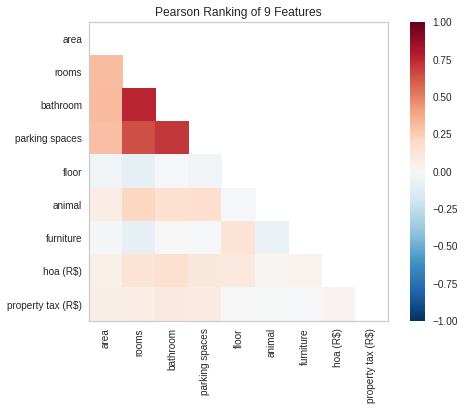

In [42]:
correlation = Rank2D( algorithm="pearson")

correlation.fit(features, predictor)
correlation.transform( features )
correlation.show()

We can see **rooms**, **bathroom**, and **parking spaces** as the most important features to our ML model.

### Spliting dataset in training and test dataset

Normally, it takes . We'll use `train_test_split` from **sklearn** lib.

In [43]:
from sklearn.model_selection import train_test_split 

In [44]:
x_training_dataset, x_test_dataset, y_training_dataset, y_test_dataset = train_test_split(
    features, predictor, test_size=0.2, random_state=10
)

In [49]:

print(f'Training dataset:\n {x_training_dataset}')
print(f'\n\nLabels from training dataset:\n {y_training_dataset}')

Training dataset:
       area  rooms  bathroom  parking spaces  floor  animal  furniture  \
7212   380      4         6               6     11       1          1   
2211    25      1         1               0      1       0          0   
4147    28      1         1               1      4       0          1   
2644   380      4         2               4      0       1          0   
3375    87      3         2               2      5       0          0   
...    ...    ...       ...             ...    ...     ...        ...   
2122   240      4         4               4     26       1          0   
6224    70      3         2               1      3       1          0   
2393    50      1         1               0      0       0          0   
8357    73      2         1               1      8       1          0   
2316    58      2         1               1      3       1          1   

      hoa (R$)  property tax (R$)  
7212      4500               3000  
2211         0                  

### Selecting best features

We do this to find some feature no helping, with 0 weight on the ML model. We'll be using `sklearn.feature_selection` lib.


Note that, we already know that **rooms**, **bathroom**, and **parking spaces** columns are good for our ML model.

In [46]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

It uses a model to check if there are features dependent to `y_training_set` (predictor).

In [74]:
def select_features( x_training_dataset, y_training_dataset ):
  
  selection = SelectKBest( score_func=mutual_info_regression, k='all')
  selection.fit(x_training_dataset, y_training_dataset)
  return selection

In [75]:
Scores = select_features( x_training_dataset, y_training_dataset )

When a feature has score 0, it means this feature doesn't influency to predict our `Y`.  

In [76]:
for position, score in enumerate(Scores.scores_):
  print( f"{x_training_dataset.columns[position]} ==> [{score}]" )

area ==> [0.04746148842304132]
rooms ==> [0.2614901951321231]
bathroom ==> [0.32236060219122775]
parking spaces ==> [0.2318571380044947]
floor ==> [0.025898718401898613]
animal ==> [0.022720510443674513]
furniture ==> [0.026162268359334107]
hoa (R$) ==> [0.06020766978962655]
property tax (R$) ==> [0.1664114034103621]


As we already know it, **bathroom**, **rooms**, and **parking spaces** have great impact to predict on your model. But, **property tax** also appears as a important feature. 

## **Building ML model**

We'll be using **Random Forest** algorithm. It an ensemble learning method.

It consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

In [78]:
from sklearn.ensemble import RandomForestRegressor

### Training the model

In [81]:
model_random_forest = RandomForestRegressor( max_depth=5 ) 
model_random_forest.fit( x_training_dataset, y_training_dataset )

RandomForestRegressor(max_depth=5)

## **Evaluation in the model performance**

We'll be starting using manual analysis.

In [83]:
predictions = model_random_forest.predict( x_test_dataset )

In [95]:
print(f'Five predicted rents: {predictions[0:10]}')

Five predicted rents: [1537.05019068 8884.7137702  7853.13421081 5088.08749357 3595.30546791
 4043.95242207 6708.42001131 1537.05019068 7208.34759705 5992.86830724]


We'll compare our predicted values to our y test dataset.

In [94]:
y_test_dataset.head(10)

9659      1000
4671     15000
7122      6900
4221      3000
8920      2000
5076      3810
10151     6500
832       1150
3031      9000
8674      1965
Name: rent amount (R$), dtype: int64

After we analyzed the first 10 lines, we identify similarities. For example, our model predicted `R$7853,13` when it should be `R$6900,00`.

### Evaluting in the model perfomance  (v2)

* We could use  `mean_squared_error` method to evaluate how much our model is failing to predict, based on *Variance*. 

* On the other hand, `r2_score` method (*Coefficient of Determination*) refers to check how well-observed results are reproduced by the model. The range is between 0 and 1.

In [97]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [99]:
print(f'RSME: { sqrt(mean_squared_error(y_test_dataset, predictions)) }')

RSME: 2460.7320068770387


It means we'll have an error of `R$2460,00` predicting the rent value in general.

In [101]:
print(f'Score: {r2_score(y_test_dataset, predictions)}')

Score: 0.5617516248835606


That means our model is not very good.

### Evaluting in the model perfomance  (v3)

It's using **Yellowbrick** lib, `PredictionError`.

In [102]:
from yellowbrick.regressor import PredictionError

We have to present which model is be using. In our case, it Random Forest.

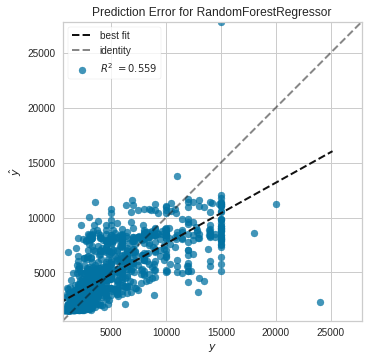

In [103]:
model = RandomForestRegressor( max_depth=5 ) 
error_model = PredictionError( model )

error_model.fit(x_training_dataset, y_training_dataset)
error_model.score(x_test_dataset, y_test_dataset)
error_model.show()

It's predicted rent value vs real rent value.

The identity is the best possible case, while best fit refers to our model.

## Exporting the ML model

We'll be using  the `dump` method from **joblib** library to dumping the model. We could use `load` to load the model and then `predict` as much as we want.

In [104]:
import joblib

In [105]:
joblib.dump(model_random_forest, "model_random_forest_v100.pkl")

['model_random_forest_v100.pkl']

## **How much is your house worth?**


We will try to find out the answer based on our ML model
